<h2>COLOR MAPPINGS</h2><BR>So far we worked on RGB color spaces, in RGB coding, colors are modeled as a combo of red green and blue. In the 1970s HSL(hue,saturation,lightness) and HSV(hue,saturation,value) were developed as alternative color models. <br>HSL and HSV are more closely aligned with the way human visison actually percieves color. <br>We learn how to convert to HSL and HSV colorspaces.<br>HSL can be imagined in cylindrical model. Hue means the several colors like red,green, blue whatever we are looking for. Saturation is how much of the hue we have and lightness is how dark or light the hue is. At top of such cylinder model is pure white and at bottom is pure black. <br> In HSV , we have Value instead of lightness. Saturation is how close we are to the hue, the closer we are the whiter and farther we are the hue increases i.e. more of the hue(color like red green blue) we have. 

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

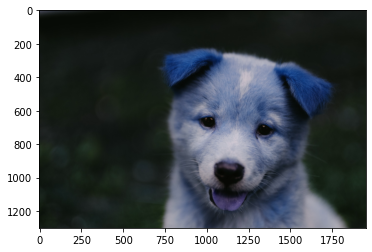

In [2]:
img = cv2.imread('00-puppy.jpg')
plt.imshow(img)

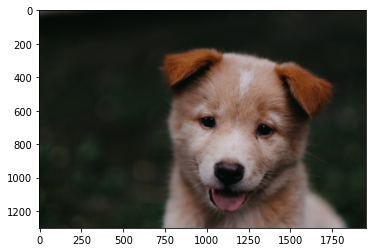

In [3]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

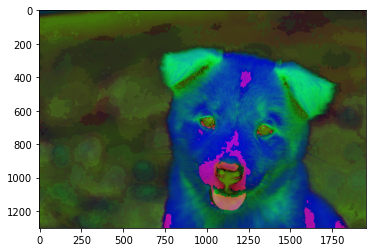

In [4]:
img2 = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(img2)

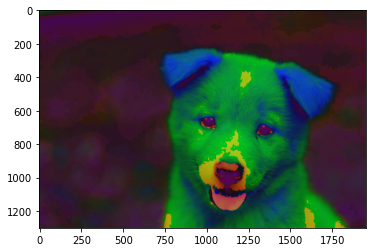

In [5]:
img2 = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
plt.imshow(img2)

<h3>Blending and Pasting images</h3><br> We often work with multiple images. OpenCV has many programmatic methods of blending images together and pasting images on top of each other. Blemding images is done using addWeighted() function that uses both images and combines them . To blend images we use simple formula :- <br> new_pixel = alpha * pixel_1 + beta * pixel_2 + gamma ..... <br> 

In [19]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img1 = cv2.imread('dog_backpack.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread('watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)



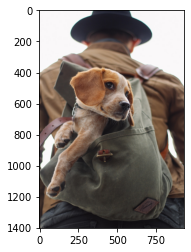

In [20]:
plt.imshow(img1)

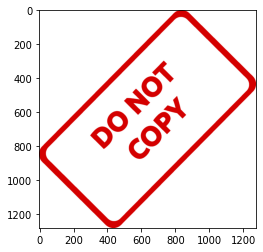

In [21]:
plt.imshow(img2) # unequal shape

In [22]:
img1.shape

(1401, 934, 3)

In [23]:
img2.shape

# we have to reshape both images to same shape if we want to blend them together

(1280, 1277, 3)

In [24]:
# Blending images of same size

img1 = cv2.resize(img1,(1200,1200))
img2 = cv2.resize(img2,(1200,1200))


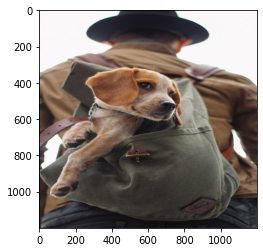

In [25]:
plt.imshow(img1)

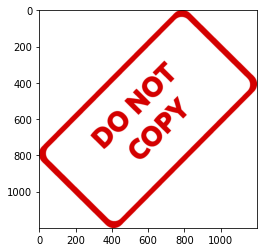

In [26]:
plt.imshow(img2)


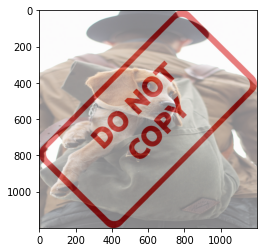

In [28]:
# Now we blend the images

blended = cv2.addWeighted(src1=img1, alpha=0.5, src2=img2,beta=0.5,gamma=0)

plt.imshow(blended)

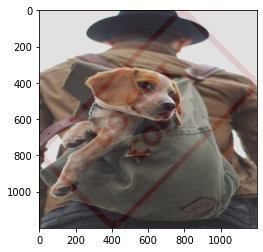

In [30]:

blended = cv2.addWeighted(src1=img1, alpha=0.8, src2=img2,beta=0.1,gamma=1)

plt.imshow(blended)

In [31]:
# Overlay small image on top of larger image (no blending)
# using numpy reassignment

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img1 = cv2.imread('dog_backpack.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread('watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)



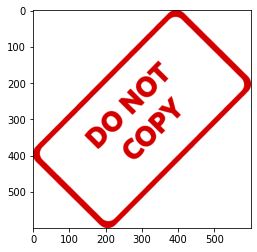

In [32]:
img2 = cv2.resize(img2, (600,600))
plt.imshow(img2)

In [33]:
large_image = img1
small_image = img2

In [34]:
x_offset = 0
y_offset = 0

In [35]:
x_end = x_offset + small_image.shape[1]
y_end = y_offset + small_image.shape[0]

In [36]:
large_image[y_offset:y_end, x_offset:x_end] = small_image

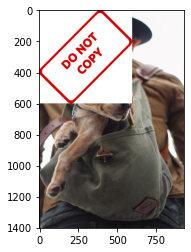

In [38]:
plt.imshow(large_image)

In [39]:
# Blend together images of different sizes

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img1 = cv2.imread('dog_backpack.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread('watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)



In [40]:
img2 = cv2.resize(img2, (600,600))


In [41]:
img1.shape

(1401, 934, 3)

In [42]:
x_offset = 934 - 600
y_offset = 1401 - 600

In [43]:
img2.shape

(600, 600, 3)

In [44]:
rows,cols,channels = img2.shape

In [45]:
rows

600

In [46]:
roi = img1[y_offset:1401, x_offset:943]

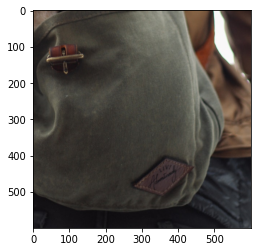

In [47]:
plt.imshow(roi)

In [48]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

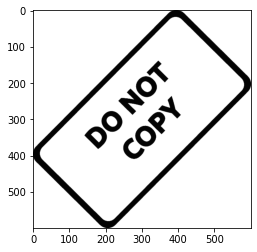

In [50]:
plt.imshow(img2gray, cmap='gray')

In [51]:
mask_inv = cv2.bitwise_not(img2gray)

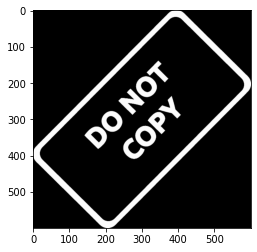

In [53]:
plt.imshow(mask_inv, cmap='gray')

In [54]:
import numpy as np
white_bg = np.full(img2.shape, 255, dtype=np.uint8)

In [56]:
white_bg.shape

(600, 600, 3)

In [57]:
bg = cv2.bitwise_or(white_bg, white_bg, mask=mask_inv)

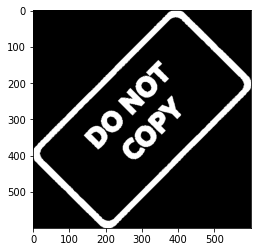

In [58]:
plt.imshow(bg)

In [59]:
fg = cv2.bitwise_or(img2,img2,mask=mask_inv)

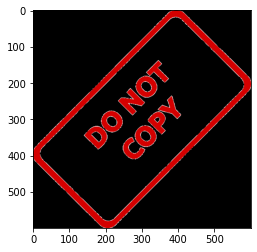

In [60]:
plt.imshow(fg)

In [61]:
final_roi = cv2.bitwise_or(roi,fg)

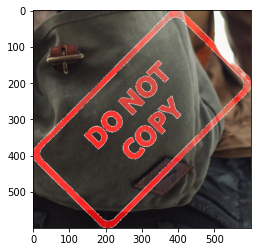

In [62]:
plt.imshow(final_roi)

In [63]:
large_image = img1
small_image = final_roi

large_image[y_offset:y_offset+small_image.shape[0], x_offset:x_offset+small_image.shape[1]] = small_image

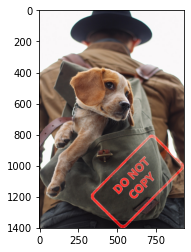

In [64]:
plt.imshow(large_image)